# Wordcloud Visualization for Bible Corpus

Data taken from kaggle: https://www.kaggle.com/oswinrh/bible/kernels

In [33]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bible = pd.read_csv(r"D:\Python datasets\t_kjv.csv")
bible.head()

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


## Entire Bible

In [20]:
bible_all = pd.read_csv(r"D:\Python datasets\t_kjv.csv")
bible_all.head()

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [21]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()


testing = bible_all.t[:-1]
bible_result_all = []
for t in testing:
    bible_result_all.append(tweet_cleaner(t))

In [22]:
clean_all = pd.DataFrame(bible_result_all,columns=['t'])
clean_all.shape

(31102, 1)

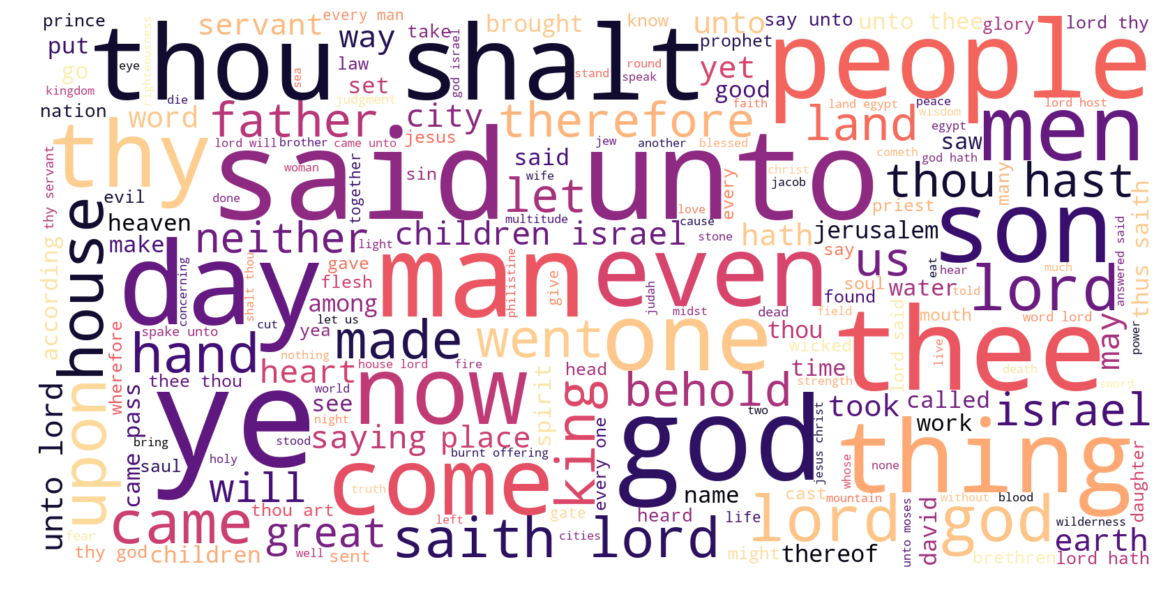

In [32]:
from PIL import Image 
neg_review = clean_all
neg_string = []
for t in neg_review.t:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# wave_mask = np.array(Image.open( "D:\Python Projects\Kaodim_red.png"))

wordcloud = WordCloud(background_color="white",stopwords = stopwords, colormap="magma", width=1600, height=800,max_font_size=200).generate(neg_string)
fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# fig.savefig("wordcloudall.jpg")
plt.show()

#

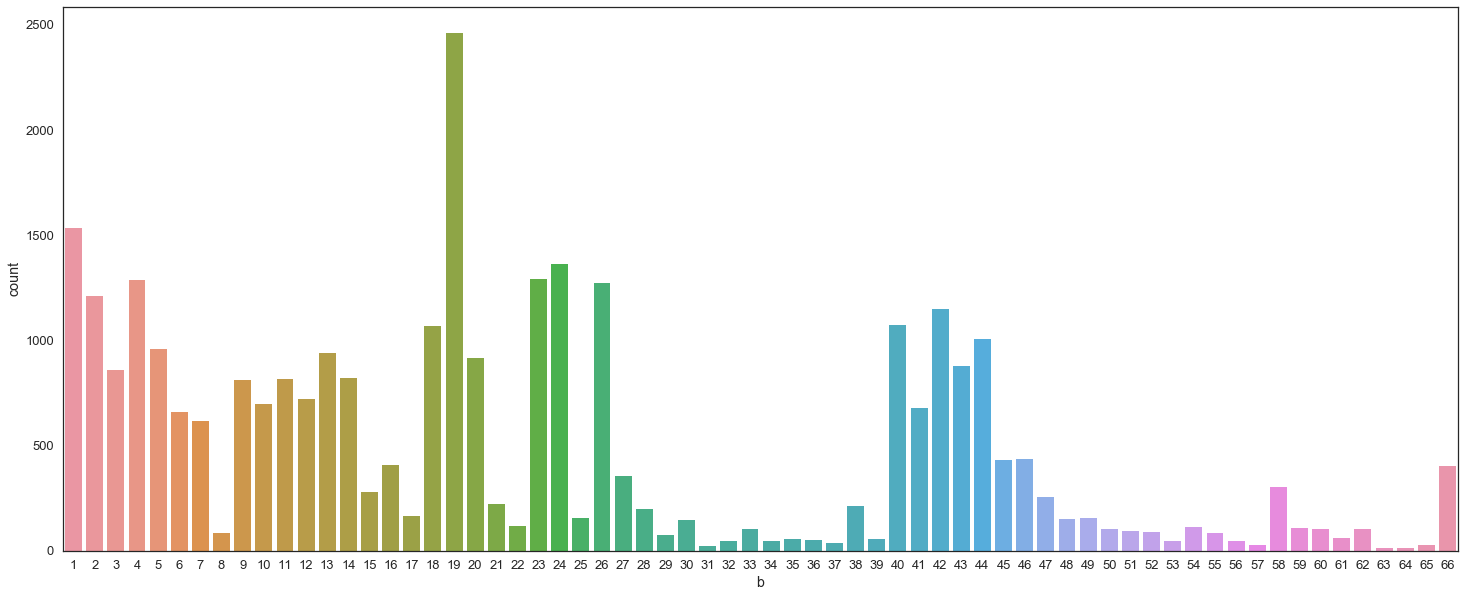

In [27]:
fig = plt.figure(figsize=(25,10))
sns.countplot(bible_all['b'])

In [4]:
bible = bible[bible['b'] >= 40]
bible.head()

,id,b,c,v,t
23145,40001001,40,1,1,"The book of the generation of Jesus Christ, th..."
23146,40001002,40,1,2,Abraham begat Isaac; and Isaac begat Jacob; an...
23147,40001003,40,1,3,And Judas begat Phares and Zara of Thamar; and...
23148,40001004,40,1,4,And Aram begat Aminadab; and Aminadab begat Na...
23149,40001005,40,1,5,And Salmon begat Booz of Rachab; and Booz bega...


In [7]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()


testing = bible.t[:-1]
bible_result = []
for t in testing:
    bible_result.append(tweet_cleaner(t))

In [9]:
clean_df = pd.DataFrame(bible_result,columns=['t'])
clean_df.shape

(7957, 1)

In [10]:
clean_df.to_csv('clean_text.csv',encoding='utf-8')
csv = 'clean_text.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,t
0,the book of the generation of jesus christ the...
1,abraham begat isaac and isaac begat jacob and ...
2,and judas begat phares and zara of thamar and ...
3,and aram begat aminadab and aminadab begat naa...
4,and salmon begat booz of rachab and booz begat...


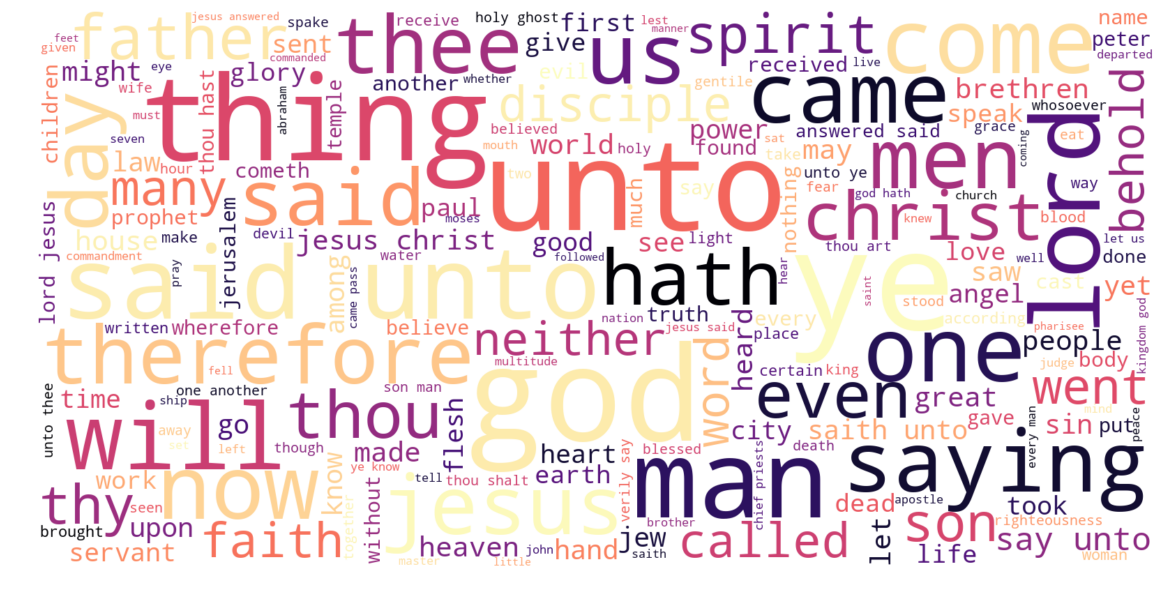

In [30]:
from PIL import Image 
neg_review = my_df
neg_string = []
for t in neg_review.t:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# wave_mask = np.array(Image.open( "D:\Python Projects\Kaodim_red.png"))

wordcloud = WordCloud(background_color="white",stopwords = stopwords,colormap="magma", width=1600, height=800,max_font_size=200).generate(neg_string)
fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig("wordcloud.jpg")
plt.show()

In [19]:
df = pd.read_csv(r"C:\Users\George\Python\clean_text.csv", index_col =0)
df.dropna(inplace = True)
df['polarity'] = df.apply(lambda x: TextBlob(x['t'], analyzer = NaiveBayesAnalyzer()).sentiment, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['t']).sentiment.subjectivity, axis=1)
print(df)

KeyboardInterrupt: 

In [14]:
import nltk
from nltk.corpus import stopwords
top_N = 50
#if not necessary all lower
a = my_df['t'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
stopWords = set(stopwords.words('english'))
wordsFiltered =[]
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
word_dist = nltk.FreqDist(wordsFiltered)

print (wordsFiltered)

['book', 'generation', 'jesus', 'christ', 'son', 'david', 'son', 'abraham', 'abraham', 'begat', 'isaac', 'isaac', 'begat', 'jacob', 'jacob', 'begat', 'judas', 'brethren', 'judas', 'begat', 'phares', 'zara', 'thamar', 'phares', 'begat', 'esrom', 'esrom', 'begat', 'aram', 'aram', 'begat', 'aminadab', 'aminadab', 'begat', 'naasson', 'naasson', 'begat', 'salmon', 'salmon', 'begat', 'booz', 'rachab', 'booz', 'begat', 'obed', 'ruth', 'obed', 'begat', 'jesse', 'jesse', 'begat', 'david', 'king', 'david', 'king', 'begat', 'solomon', 'wife', 'urias', 'solomon', 'begat', 'roboam', 'roboam', 'begat', 'abia', 'abia', 'begat', 'asa', 'asa', 'begat', 'josaphat', 'josaphat', 'begat', 'joram', 'joram', 'begat', 'ozias', 'ozias', 'begat', 'joatham', 'joatham', 'begat', 'achaz', 'achaz', 'begat', 'ezekias', 'ezekias', 'begat', 'manasses', 'manasses', 'begat', 'amon', 'amon', 'begat', 'josias', 'josias', 'begat', 'jechonias', 'brethren', 'time', 'carried', 'away', 'babylon', 'brought', 'babylon', 'jechoni

In [15]:
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt.to_csv('comment.csv',encoding='utf-8')
csv = 'comment.csv'
print(rslt)

         Word  Frequency
0        unto       2446
1          ye       1559
2       shall       1415
3         god       1372
4        said       1061
5       jesus        982
6         man        908
7        thou        857
8      things        729
9        lord        727
10        one        608
11       also        599
12       come        587
13     christ        570
14       hath        557
15       came        506
16         us        489
17       thee        483
18     saying        455
19        say        428
20        son        422
21        thy        416
22        men        396
23     father        370
24  therefore        356
25        let        342
26       went        338
27        day        319
28      saith        307
29       know        299
30       many        286
31       made        286
32        may        284
33      every        280
34       even        275
35       upon        263
36     spirit        261
37     heaven        256
38      great        254


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

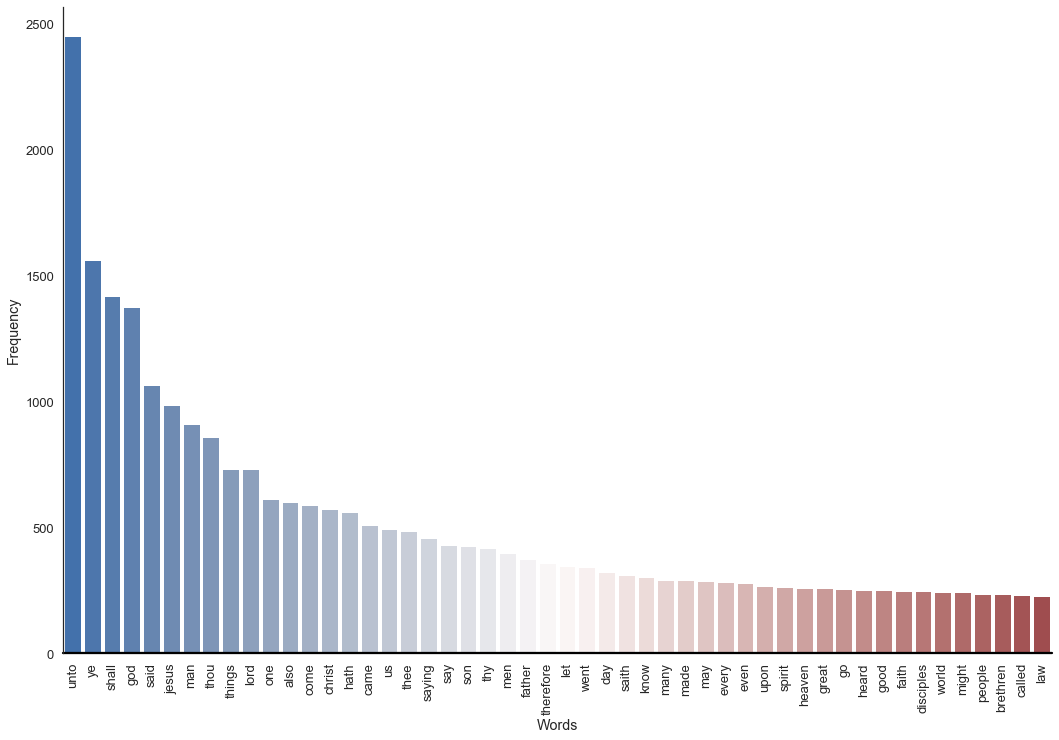

In [17]:
import seaborn as sns
fig = plt.figure(figsize=(15,10))
sns.set(style = "white", context = "talk", font_scale = 1)
ax1 = sns.barplot(x="Word", y="Frequency", palette="vlag", data = rslt, ci = None)
ax1.axhline(0, color = "k", clip_on= False)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Words")
sns.despine(bottom = True)
plt.tight_layout(h_pad=2)
plt.xticks(rotation=90)